In [122]:
import keras
from keras.datasets import mnist
from keras import models, layers

In [6]:
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [8]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

## IMDb: 2値クラス分類

In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [15]:
print(train_labels[0])

1


In [17]:
max([max(sequence) for sequence in train_data])

9999

In [18]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 2s 1us/step


In [24]:
word_index['dog']

909

In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [26]:
reverse_word_index[909]

'dog'

In [37]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [43]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [44]:
train_data.shape

(25000,)

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
x_train.shape

(25000, 10000)

In [49]:
x_test.shape

(25000, 10000)

In [74]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [83]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [58]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [61]:
x_train.shape

(25000, 10000)

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [63]:
x_val.shape, partial_x_train.shape

((10000, 10000), (15000, 10000))

In [64]:
y_val.shape, partial_y_train.shape

((10000,), (15000,))

In [85]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 56us/step - loss: 0.5180 - acc: 0.7729 - val_loss: 0.3880 - val_acc: 0.8591
Epoch 2/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.3068 - acc: 0.9031 - val_loss: 0.3130 - val_acc: 0.8801
Epoch 3/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.2256 - acc: 0.9264 - val_loss: 0.2776 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.1788 - acc: 0.9422 - val_loss: 0.2737 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.1446 - acc: 0.9533 - val_loss: 0.3273 - val_acc: 0.8711
Epoch 6/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.1211 - acc: 0.9633 - val_loss: 0.2973 - val_acc: 0.8839
Epoch 7/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.0999 - acc: 0.9695 - val_loss: 0.3266 - val_acc

In [86]:
type(history)

keras.callbacks.callbacks.History

In [87]:
history_dict = history.history

In [88]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

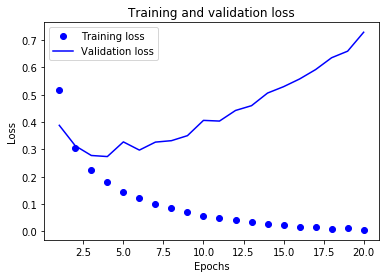

In [89]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

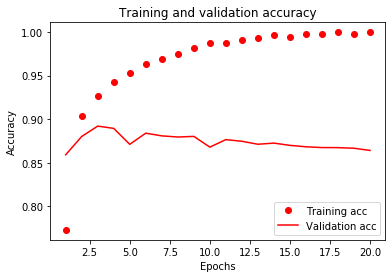

In [91]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.4584 - accuracy: 0.8248
Epoch 2/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.2681 - accuracy: 0.9070
Epoch 3/4
25000/25000 [==============================] - 1s 30us/step - loss: 0.2042 - accuracy: 0.9280
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


In [93]:
results

[0.29691764933586123, 0.8821600079536438]

In [94]:
model.predict(x_test)

array([[0.19735667],
       [0.9995214 ],
       [0.4785001 ],
       ...,
       [0.08180028],
       [0.05502659],
       [0.432633  ]], dtype=float32)

In [97]:
# 隠れ層を1つに
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 34us/step - loss: 0.4586 - accuracy: 0.8281
Epoch 2/4
25000/25000 [==============================] - 1s 30us/step - loss: 0.2850 - accuracy: 0.9068
Epoch 3/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.2241 - accuracy: 0.9230
Epoch 4/4
25000/25000 [==============================] - 1s 47us/step
[0.2796432132911682, 0.8894400000572205]


In [98]:
# 隠れ層を3つに
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.4589 - accuracy: 0.8108
Epoch 2/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.2501 - accuracy: 0.9094
Epoch 3/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.1955 - accuracy: 0.9286
Epoch 4/4
25000/25000 [==============================] - 1s 42us/step
[0.33926079574108126, 0.8700399994850159]


In [100]:
# 隠れ層を32ユニットに
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.4196 - accuracy: 0.8213
Epoch 2/4
25000/25000 [==============================] - 1s 34us/step - loss: 0.2382 - accuracy: 0.9126
Epoch 3/4
25000/25000 [==============================] - 1s 33us/step - loss: 0.1855 - accuracy: 0.9319
Epoch 4/4
25000/25000 [==============================] - 1s 44us/step
[0.31606563147068023, 0.8787599802017212]


In [101]:
# 隠れ層を64ユニットに
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.4199 - accuracy: 0.8096
Epoch 2/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.2398 - accuracy: 0.9091
Epoch 3/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.1847 - accuracy: 0.9303
Epoch 4/4
25000/25000 [==============================] - 1s 51us/step
[0.31391797998428345, 0.879360020160675]


In [102]:
# 活性化関数をtanhに
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.4127 - accuracy: 0.8266
Epoch 2/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.2293 - accuracy: 0.9149
Epoch 3/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.1749 - accuracy: 0.9350
Epoch 4/4
25000/25000 [==============================] - 1s 37us/step
[0.36996804918289183, 0.8642799854278564]


In [103]:
# mseに
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 1s 34us/step - loss: 0.1444 - accuracy: 0.8305
Epoch 2/4
25000/25000 [==============================] - 1s 31us/step - loss: 0.0768 - accuracy: 0.9113
Epoch 3/4
25000/25000 [==============================] - 1s 30us/step - loss: 0.0586 - accuracy: 0.9300
Epoch 4/4
25000/25000 [==============================] - 1s 33us/step
[0.09385814151406288, 0.8730000257492065]


## Reuters: 他クラス単一ラベル分類

In [104]:
from keras.datasets import reuters

In [105]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


In [106]:
len(train_data)

8982

In [107]:
len(test_data)

2246

In [109]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [110]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

557056/550378 [==============================] - 1s 2us/step


In [112]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [113]:
train_labels[10]

3

In [164]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [165]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [166]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

In [167]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [168]:
one_hot_train_labels.shape

(8982, 46)

In [169]:
one_hot_test_labels.shape

(2246, 46)

In [170]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [171]:
one_hot_train_labels.shape

(8982, 46)

In [177]:
one_hot_test_labels.shape

(2246, 46)

In [178]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [179]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [180]:
x_train.shape

(8982, 10000)

In [181]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [182]:
x_val.shape, partial_x_train.shape

((1000, 10000), (7982, 10000))

In [183]:
y_val.shape, partial_y_train.shape

((1000, 46), (7982, 46))

In [136]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 76us/step - loss: 2.6696 - accuracy: 0.5189 - val_loss: 1.7892 - val_accuracy: 0.6330
Epoch 2/20
7982/7982 [==============================] - 0s 43us/step - loss: 1.4640 - accuracy: 0.6977 - val_loss: 1.3349 - val_accuracy: 0.6960
Epoch 3/20
7982/7982 [==============================] - 0s 44us/step - loss: 1.0626 - accuracy: 0.7730 - val_loss: 1.1584 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 0s 45us/step - loss: 0.8319 - accuracy: 0.8271 - val_loss: 1.0444 - val_accuracy: 0.7840
Epoch 5/20
7982/7982 [==============================] - 0s 43us/step - loss: 0.6597 - accuracy: 0.8651 - val_loss: 0.9736 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 0s 42us/step - loss: 0.5288 - accuracy: 0.8911 - val_loss: 0.9559 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 0s 44us/step - loss: 0.426

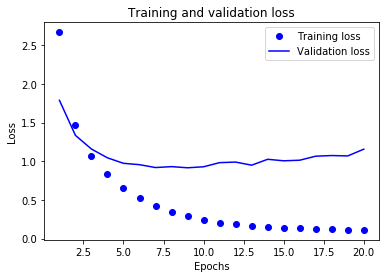

In [137]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

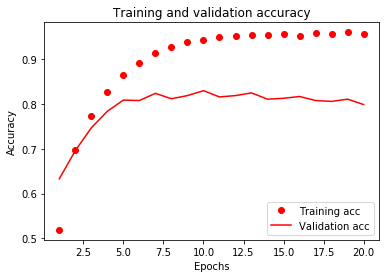

In [141]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [143]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 0s 60us/step - loss: 2.6219 - accuracy: 0.4630 - val_loss: 1.7961 - val_accuracy: 0.6250
Epoch 2/8
7982/7982 [==============================] - 0s 43us/step - loss: 1.4670 - accuracy: 0.6982 - val_loss: 1.3197 - val_accuracy: 0.7230
Epoch 3/8
7982/7982 [==============================] - 0s 42us/step - loss: 1.0701 - accuracy: 0.7746 - val_loss: 1.1350 - val_accuracy: 0.7540
Epoch 4/8
7982/7982 [==============================] - 0s 41us/step - loss: 0.8404 - accuracy: 0.8190 - val_loss: 1.0431 - val_accuracy: 0.7950
Epoch 5/8
7982/7982 [==============================] - 0s 44us/step - loss: 0.6714 - accuracy: 0.8568 - val_loss: 0.9503 - val_accuracy: 0.8040
Epoch 6/8
7982/7982 [==============================] - 0s 45us/step - loss: 0.5412 - accuracy: 0.8881 - val_loss: 0.9172 - val_accuracy: 0.8130
Epoch 7/8
7982/7982 [==============================] - 0s 42us/step - loss: 0.4360 - acc

In [144]:
import copy

In [145]:
test_labels_copy = copy.copy(test_labels)

In [147]:
np.random.shuffle(test_labels_copy)

In [148]:
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19056099732858414

In [149]:
predictions = model.predict(x_test)

In [151]:
predictions[0].shape

(46,)

In [152]:
np.sum(predictions[0])

1.0000001

In [153]:
np.argmax(predictions[0])

3

In [160]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [184]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 70us/step - loss: 3.3486 - accuracy: 0.3687 - val_loss: 2.9175 - val_accuracy: 0.5400
Epoch 2/8
7982/7982 [==============================] - 0s 41us/step - loss: 2.6278 - accuracy: 0.5361 - val_loss: 2.3680 - val_accuracy: 0.5440
Epoch 3/8
7982/7982 [==============================] - 0s 42us/step - loss: 2.1191 - accuracy: 0.5500 - val_loss: 2.0112 - val_accuracy: 0.5570
Epoch 4/8
7982/7982 [==============================] - 0s 39us/step - loss: 1.7866 - accuracy: 0.5757 - val_loss: 1.7946 - val_accuracy: 0.5720
Epoch 5/8
7982/7982 [==============================] - 0s 43us/step - loss: 1.5757 - accuracy: 0.5980 - val_loss: 1.6667 - val_accuracy: 0.5990
Epoch 6/8
7982/7982 [==============================] - 0s 38us/step - loss: 1.4258 - accuracy: 0.6200 - val_loss: 1.5985 - val_accuracy: 0.6050
Epoch 7/8
7982/7982 [==============================] - 0s 41us/step - loss: 1.3076 - acc

## Boston Housing: 回帰

In [185]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 6us/step


In [186]:
train_data.shape

(404, 13)

In [187]:
test_data.shape

(102, 13)

In [189]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [193]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [194]:
test_data -= mean
test_data /= std

In [196]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [203]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)

    print('%d' % i, partial_train_data.shape, val_data.shape)

    model = build_model()
    
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
0 (303, 13) (101, 13)
processing fold # 1
1 (303, 13) (101, 13)
processing fold # 2
2 (303, 13) (101, 13)
processing fold # 3
3 (303, 13) (101, 13)


In [204]:
all_scores

[2.127089500427246, 2.6792478561401367, 2.5878026485443115, 2.6905133724212646]

In [205]:
np.mean(all_scores)

2.5211633443832397

In [209]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [210]:
len(all_mae_histories)

4

In [212]:
len(all_mae_histories[0])

500

In [213]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [215]:
len(average_mae_history)

500

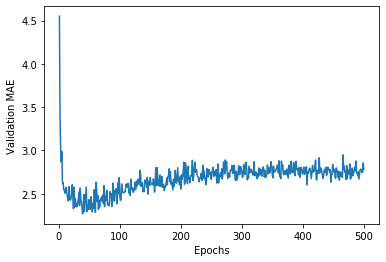

In [217]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [220]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

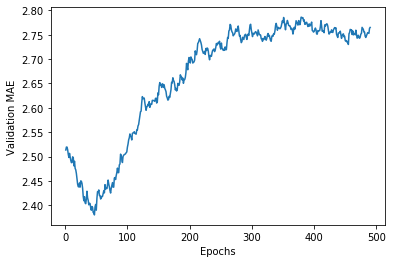

In [221]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [222]:
# 最終モデルの訓練
model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 258us/step


In [223]:
test_mae_score

25.682435989379883